# Mobile inverted pendulum python dynamics new

author:SeongHyeon Kim

program:PYDY balancing robot simulator


필요한 라이브러리 포함


In [1]:
from sympy import sin, cos, symbols, solve, Matrix, init_printing
from sympy.physics.mechanics import *
from sympy.physics.vector import ReferenceFrame
import sympy.physics.mechanics as me
import sympy as sm
import math as m
import numpy as np

In [2]:
init_vprinting()

# Reference frames

N은 외부의 기준 프레임. 속도를 0으로

In [3]:
#Newtonian reference frame
N=ReferenceFrame('N')

# Define a world coordinate origin
No = Point('No')
No.set_vel(N, 0)

In [4]:
F = ReferenceFrame('F')

P = ReferenceFrame('P')

F = N.orientnew('F', 'Axis',[psi, N.z] )     # Intermediate reference frame

P = F.orientnew('P', 'Axis', [theta, F.y])   # Inverted Pendulum

기준프레임.dcm(상대프레임)

## Newtonian, Bodies, Frames, Particles, Points


In [5]:
Mp =sm.symbols('Mp')
M = sm.symbols('M')

Po = me.Point('p_cm')
Lo = me.Point('L_cm')
body_l_f = me.ReferenceFrame('L_f')

Ro = me.Point('R_cm')
body_r_f = me.ReferenceFrame('R_f')

frame_f = me.ReferenceFrame('f')
Ip = me.Point('I_p')
LN = me.Point('ln')
RN = me.Point('rn')

## Variables, Constants and Specified


In [6]:
x = me.dynamicsymbols('x')            # F1> measure number of Velocity of P in N
xd = me.dynamicsymbols('x', 1)
theta = me.dynamicsymbols('theta')    # F2> measure number of Angular velocity of P in N
thetad = me.dynamicsymbols('theta', 1)
delta = me.dynamicsymbols('delta')    # N3> measure number of Angular velocity of P in N
deltad = me.dynamicsymbols('delta', 1)
wL = me.dynamicsymbols('wL')          # Angular velocity of L in N
wLd = me.dynamicsymbols('wL', 1)
wR = me.dynamicsymbols('wR')          # Angular velocity of R in N
wRd = me.dynamicsymbols('wR', 1)

g = sm.symbols('g', real=True)        #Gravitational acceleration
d = sm.symbols('d', real=True)        # Distance from point I to Lo (or Ro)
R = sm.symbols('r', real=True)        #Radius of wheels
l = sm.symbols('l', real=True)        # Distance from point I to mass center of P
t = sm.symbols('t')


# Create q and dq vectors
q = Matrix([x, theta, delta, wL, wR])
dq = q.diff()

## Generalized speed

In [50]:
u1 = me.dynamicsymbols('u1')           #x-dot
u2 = me.dynamicsymbols('u2')           #theta-dot     
u3 = me.dynamicsymbols('u3')           #delta-dot   
u4 = me.dynamicsymbols('u4')           #wL-dot
u5 = me.dynamicsymbols('u5')           #wR-dot
uL = Matrix([u1, u2, u3, u4, u5])

## Mass and Inertia

관성모멘트함수=inertia(기준 좌표, xx, yy,zz회전)

In [8]:
K,J = symbols('K J')

In [9]:
I_L = inertia(F, K,J,K)                          #Wheel inertia 
I_R = inertia(F, K,J,K)


In [10]:
m_b = symbols('m_b')                              #Mass of the body
I1, I2, I3 = symbols('I1 I2 I3')                  #Moments of inertia of body

In [11]:
# Calculate inertia of body
Ib = inertia(F, I1, I2, I3)

###  Geometry relating unit vectors

In [12]:
F.orient(N, 'Axis', [delta, N.z])

In [13]:
P.orient(F, 'Axis', [theta, F.y])

In [14]:
N.dcm(F)

⎡cos(δ)  -sin(δ)  0⎤
⎢                  ⎥
⎢sin(δ)  cos(δ)   0⎥
⎢                  ⎥
⎣  0        0     1⎦

In [15]:
F.dcm(P)

⎡cos(θ)   0  sin(θ)⎤
⎢                  ⎥
⎢   0     1    0   ⎥
⎢                  ⎥
⎣-sin(θ)  0  cos(θ)⎦

## Position vectors

기준.locatenew('이름', 이동*단위백터)

P_No_I = x*F.x    # Point No to I
P_I_Po = l*P.z    # Point I to mass center of P
P_I_Lo = d*F.y    # Point I to center of wheel L
P_I_Ro = -d*F.y   # Point I to center of wheel R
P_Lo_LN = -R*F.z   # Center of wheel L to contact point LN
P_Ro_RN = -R*F.z   # Center of wheel R to contact point RN

In [16]:
I = No.locatenew('I', x*F.x)      # Point No to I

Po = I.locatenew('Po', l*P.z)     # Point I to mass center of P

Lo = I.locatenew('Lo', d*F.y)     # Point I to center of wheel L

Ro = I.locatenew('Ro', -d*F.y)    # Point I to center of wheel R

LN = Lo.locatenew('LN', -R*F.z)   # Center of wheel L to contact point LN

RN = Ro.locatenew('RN', -R*F.z)   # Center of wheel R to contact point RN

## Angular Velocities


In [17]:
F.set_ang_vel(N, u3*N.z)        # Angular velocity of F in N
P.set_ang_vel(F, u2*F.y)        # Angular velocity of P in F
body_l_f.set_ang_vel(F, u4*F.y)    # wL is related to w and v due to rolling
body_r_f.set_ang_vel(F, u5*F.y)    # wR is related to w and v due to rolling

## Velocities of relevant points


v2pt_theory는 선속도를 의미


$$^I\mathbf{v}^{P_2} = ^I\mathbf{v}^{P_1} + ^I\omega^A \times \mathbf{r}^{\frac{P_2}{P_1}}$$

The `Point.v2pt_theory()` method makes it easy to do this calculation.

측정점.v2pt_theory(회전 중심점, 관찰틀, 회전틀(돌아가는 애))



속도를 측정하는게 아니고 부여하는거 같다 좀더 알아보자

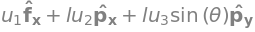

In [18]:
V_I_N = I.set_vel(N, u1*F.x)             # Velocity of point I in N

V_PO_N = Po.v2pt_theory(I,N,P)           # Velocity of center of mass of P

V_LO_N = Lo.v2pt_theory(I, N,P,)         # Velocity of center of L

V_RO_N = Ro.v2pt_theory(I,N,P)           # Velocity of center of R

V_LN_N = LN.v2pt_theory(Lo,N,body_l_f)          # Velocity of contact point of L

V_RN_N = RN.v2pt_theory(Ro,N,body_r_f)          # Velocity of contact point of R

V_PO_N


RigidBody =강체 선언 (입자로 저장된다고 한다)


 B = RigidBody ( '이름' ,질량 중심, 프레임 ,질량, ( I , P ))
 

In [19]:

body_p = me.RigidBody('p', Po, P, Mp, (Ib, Po))
body_l = me.RigidBody('l', Lo, body_l_f, M, (I_L, Lo))
body_r = me.RigidBody('r', Ro, body_r_f, M,(I_R, Ro))

### Forces

#### gravity

In [20]:
#중력벡터
Gravity = -g * N.z      #Gravity Vector


In [21]:
body_gravity_vector =-g*Mp*N.z

In [22]:
leftwheel_gravity_vector = - M*g*N.z

In [23]:
rightwheel_gravity_vector = - M*g*N.z

In [24]:
b_g_f = (Po, body_gravity_vector)

In [25]:
l_g_f = (Lo, leftwheel_gravity_vector)

In [26]:
r_g_f = (Ro, rightwheel_gravity_vector)

In [27]:
type(Po)

sympy.physics.vector.point.Point

In [28]:
type(body_gravity_vector)

sympy.physics.vector.vector.Vector

### Torques

바퀴가 받는 토크, 바퀴에 의해 생기는 몸의 반작용 토크

In [29]:
body_torque, Lwheel_torque, Rwheel_torque = dynamicsymbols('T_b, T_r, T_l')

In [30]:
Lwheel_torque_vector = Lwheel_torque * F.y

In [31]:
Rwheel_torque_vector = Rwheel_torque * F.y

In [32]:
body_torque_vector = -Lwheel_torque_vector -Rwheel_torque_vector

In [33]:
Lwheel_torque = (body_l_f, Lwheel_torque_vector)

In [34]:
Rwheel_torque = (body_r_f, Rwheel_torque_vector)

In [35]:
body_torque = (P, body_torque_vector)

In [36]:
body_torque

(P, (-T_l(t) - T_r(t))*F.y)

### Equations of Motions

q는 위치 dq 속력

In [37]:
q

⎡x ⎤
⎢  ⎥
⎢θ ⎥
⎢  ⎥
⎢δ ⎥
⎢  ⎥
⎢wL⎥
⎢  ⎥
⎣wR⎦

In [39]:
FL = [b_g_f,
         r_g_f,
         l_g_f,
         Lwheel_torque,
         Rwheel_torque,
         body_torque]
FL

[(Po, - Mp*g*N.z),
 (Ro, - M*g*N.z),
 (Lo, - M*g*N.z),
 (L_f, T_r(t)*F.y),
 (R_f, T_l(t)*F.y),
 (P, (-T_l(t) - T_r(t))*F.y)]

## Constranits

In [40]:
Dependent1 =dot(V_LN_N ,F.x)

In [41]:
Dependent1

In [42]:
Dependent2 = dot(V_RN_N, F.x)

In [43]:
Dependent2

# Kinematical Differential Equations

In [88]:
kde = [xd - u1,
       thetad - u2,
       deltad - u3,
       wLd - u4,
       wRd - u5]
kde

# 운동방정식으로 만들자

## Generalized Forces

[토크힘] x [속도,각속도]

[Cm속도, 앞바퀴각속도, 뒷바퀴각속도, 몸체 각속도] x [중력, 앞바퀴토크, 뒷바퀴토크, Cm토크] 

VnWxTnF

In [45]:
from __future__ import print_function, division

In [46]:
from sympy import trigsimp
from sympy.physics.mechanics import KanesMethod

In [47]:
from sympy.physics.vector import init_vprinting

In [48]:
BL = [body_p,body_l,body_r]
BL

[p, l, r]

In [51]:
kane = KanesMethod(
    N,
    q,
    uL,
    kd_eqs=kde,
    q_dependent=None,
    configuration_constraints=None,
    u_dependent=None,
    velocity_constraints=None,
    acceleration_constraints=None,
    u_auxiliary=None,
    bodies=None,
    forcelist=None,
)

ValueError: There must be an equal number of kinematic differential equations and coordinates.

In [52]:
kane

In [53]:
fr, frstar = kane.kanes_equations( BL, FL)

In [89]:
MM = kane.mass_matrix

In [90]:
forcing = kane.forcing

In [91]:
rhs = MM.inv() * forcing

In [92]:
kdd = kane.kindiffdict()

In [93]:
rhs = rhs.subs(kdd)

In [94]:
rhs.simplify()

In [95]:
mprint(rhs)

Matrix([
[Mp*l*((I2 + Mp*l**2)*(u2**2 + u3**2)*sin(theta) - (Mp*g*l*sin(theta) + Mp*l**2*u3**2*sin(2*theta)/2 - T_l - T_r)*cos(theta))/(2*I2*M + I2*Mp + 2*M*Mp*l**2 + Mp**2*l**2*sin(theta)**2)],
[    (-Mp**2*l**2*(u2**2 + u3**2)*sin(2*theta)/2 + (2*M + Mp)*(Mp*g*l*sin(theta) + Mp*l**2*u3**2*sin(2*theta)/2 - T_l - T_r))/(2*I2*M + I2*Mp + 2*M*Mp*l**2 + Mp**2*l**2*sin(theta)**2)],
[                                                                                            -Mp*l*(2*l*u2*cos(theta) + u1)*u3*sin(theta)/(I3 + 2*K + 2*M*d**2 + Mp*l**2*sin(theta)**2)],
[                                                                                                                                                                                 T_r/J],
[                                                                                                                                                                                 T_l/J]])


In [96]:
showme = trigsimp(rhs)
showme

⎡     ⎛                                  ⎛                    2   2           
⎢     ⎜⎛         2⎞ ⎛  2     2⎞          ⎜                Mp⋅l ⋅u₃ ⋅sin(2⋅θ)  
⎢Mp⋅l⋅⎜⎝I₂ + Mp⋅l ⎠⋅⎝u₂  + u₃ ⎠⋅sin(θ) - ⎜Mp⋅g⋅l⋅sin(θ) + ────────────────── -
⎢     ⎝                                  ⎝                        2           
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                                  2     2  2    2            
⎢                         2⋅I₂⋅M + I₂⋅Mp + 2⋅M⋅Mp⋅l  + Mp ⋅l ⋅sin (θ)         
⎢                                                                             
⎢      2  2 ⎛  2     2⎞                       ⎛                    2   2      
⎢    Mp ⋅l ⋅⎝u₂  + u₃ ⎠⋅sin(2⋅θ)              ⎜                Mp⋅l ⋅u₃ ⋅sin(2
⎢  - ─────────────────────────── + (2⋅M + Mp)⋅⎜Mp⋅g⋅l⋅sin(θ) + ───────────────
⎢                 2                           ⎝                        2      
⎢  ─────────────────────────────────────────────────

### F + F* =0 식 (Kanes equation)

In [54]:
trigsimp(fr + frstar)

⎡                        2                 2                                  
⎢       -2⋅M⋅u₁̇ + Mp⋅l⋅u₂ ⋅sin(θ) + Mp⋅l⋅u₃ ⋅sin(θ) - Mp⋅l⋅cos(θ)⋅u₂̇ - Mp⋅u₁
⎢                                                                             
⎢                      2   2                                                  
⎢                  Mp⋅l ⋅u₃ ⋅sin(2⋅θ)                    ⎛         2⎞         
⎢  Mp⋅g⋅l⋅sin(θ) + ────────────────── - Mp⋅l⋅cos(θ)⋅u₁̇ - ⎝I₂ + Mp⋅l ⎠⋅u₂̇ - T
⎢                          2                                                  
⎢                                                                             
⎢      2                                      ⎛                2       2    2 
⎢- Mp⋅l ⋅u₂⋅u₃⋅sin(2⋅θ) - Mp⋅l⋅u₁⋅u₃⋅sin(θ) - ⎝I₃ + 2⋅K + 2⋅M⋅d  + Mp⋅l ⋅sin (
⎢                                                                             
⎢                                    -J⋅u₄̇ + Tᵣ                              
⎢                                                   

In [55]:
mass_matrix = trigsimp(kane.mass_matrix_full)
mass_matrix

⎡1  0  0  0  0       0            0                       0                  0
⎢                                                                             
⎢0  1  0  0  0       0            0                       0                  0
⎢                                                                             
⎢0  0  1  0  0       0            0                       0                  0
⎢                                                                             
⎢0  0  0  1  0       0            0                       0                  0
⎢                                                                             
⎢0  0  0  0  1       0            0                       0                  0
⎢                                                                             
⎢0  0  0  0  0   2⋅M + Mp    Mp⋅l⋅cos(θ)                  0                  0
⎢                                                                             
⎢                                     2             

In [56]:
forcing_vector = trigsimp(kane.forcing_full)
forcing_vector

⎡                     u₁                     ⎤
⎢                                            ⎥
⎢                     u₂                     ⎥
⎢                                            ⎥
⎢                     u₃                     ⎥
⎢                                            ⎥
⎢                     u₄                     ⎥
⎢                                            ⎥
⎢                     u₅                     ⎥
⎢                                            ⎥
⎢               ⎛  2     2⎞                  ⎥
⎢          Mp⋅l⋅⎝u₂  + u₃ ⎠⋅sin(θ)           ⎥
⎢                                            ⎥
⎢                    2   2                   ⎥
⎢                Mp⋅l ⋅u₃ ⋅sin(2⋅θ)          ⎥
⎢Mp⋅g⋅l⋅sin(θ) + ────────────────── - Tₗ - Tᵣ⎥
⎢                        2                   ⎥
⎢                                            ⎥
⎢    -Mp⋅l⋅(2⋅l⋅u₂⋅cos(θ) + u₁)⋅u₃⋅sin(θ)    ⎥
⎢                                            ⎥
⎢                     Tᵣ                     ⎥
⎢            

In [57]:
find_dynamicsymbols(kane.forcing)

In [58]:
fr

⎡           0           ⎤
⎢                       ⎥
⎢Mp⋅g⋅l⋅sin(θ) - Tₗ - Tᵣ⎥
⎢                       ⎥
⎢           0           ⎥
⎢                       ⎥
⎢          Tᵣ           ⎥
⎢                       ⎥
⎣          Tₗ           ⎦

In [59]:
frstar

⎡       2           2                          ⎛      2       2    2   ⎞      
⎢Mp⋅l⋅u₃ ⋅sin(θ)⋅cos (θ) - Mp⋅l⋅cos(θ)⋅u₂̇ - Mp⋅⎝- l⋅u₂  - l⋅u₃ ⋅sin (θ)⎠⋅sin(
⎢                                                                             
⎢                      2   2                                  ⎛         2⎞    
⎢                  Mp⋅l ⋅u₃ ⋅sin(θ)⋅cos(θ) - Mp⋅l⋅cos(θ)⋅u₁̇ - ⎝I₂ + Mp⋅l ⎠⋅u₂
⎢                                                                             
⎢          2                                           ⎛                2     
⎢  - 2⋅Mp⋅l ⋅u₂⋅u₃⋅sin(θ)⋅cos(θ) - Mp⋅l⋅u₁⋅u₃⋅sin(θ) - ⎝I₃ + 2⋅K + 2⋅M⋅d  + Mp
⎢                                                                             
⎢                                            -J⋅u₄̇                           
⎢                                                                             
⎣                                            -J⋅u₅̇                           

                 ⎤
θ) - (2⋅M + Mp)⋅u₁̇⎥
           

In [61]:
from numpy import array, zeros, eye, asarray, dot, rad2deg
from numpy.linalg import inv

In [62]:
%matplotlib inline

In [63]:
from matplotlib.pyplot import plot, xlabel, ylabel, legend, rcParams

In [64]:
rcParams['figure.figsize'] = (14, 8)

In [65]:
from sympy import simplify, Matrix, matrix2numpy
from sympy.physics.vector import init_vprinting, vlatex

In [66]:
%precision 3

'%.3f'

In [67]:
equilibrium_point = zeros(len(q + dq))
equilibrium_point

array([0., 0., 0., 0., 0.])

In [77]:
equilibrium_dict = dict(zip(q + uL, equilibrium_point))
equilibrium_dict

In [78]:
M, F_A, F_B, r = kane.linearize(new_method=True, op_point=equilibrium_dict)

In [79]:
simplify(M)

⎡1  0  0  0  0       0             0                        0                 
⎢                                                                             
⎢0  1  0  0  0       0             0                        0                 
⎢                                                                             
⎢0  0  1  0  0       0             0                        0                 
⎢                                                                             
⎢0  0  0  1  0       0             0                        0                 
⎢                                                                             
⎢0  0  0  0  1       0             0                        0                 
⎢                                                                             
⎢0  0  0  0  0   -2⋅M - Mp    -Mp⋅l⋅cos(θ)                  0                 
⎢                                                                             
⎢                                       2           

In [80]:
simplify(F_A)

⎡0                             0                              0  0  0        1
⎢                                                                             
⎢0                             0                              0  0  0        0
⎢                                                                             
⎢0                             0                              0  0  0        0
⎢                                                                             
⎢0                             0                              0  0  0        0
⎢                                                                             
⎢0                             0                              0  0  0        0
⎢                                                                             
⎢               ⎛  2            2                   ⎞                         
⎢0        -Mp⋅l⋅⎝u₂ ⋅cos(θ) + u₃ ⋅cos(θ) + sin(θ)⋅u₂̇⎠         0  0  0        
⎢                                                   

In [81]:
simplify(F_B) 

⎡0   0 ⎤
⎢      ⎥
⎢0   0 ⎥
⎢      ⎥
⎢0   0 ⎥
⎢      ⎥
⎢0   0 ⎥
⎢      ⎥
⎢0   0 ⎥
⎢      ⎥
⎢0   0 ⎥
⎢      ⎥
⎢1   1 ⎥
⎢      ⎥
⎢0   0 ⎥
⎢      ⎥
⎢0   -1⎥
⎢      ⎥
⎣-1  0 ⎦

# Simulation

In [73]:
from sympy import Dummy, lambdify
from numpy import array, hstack, zeros, linspace, pi
from numpy.linalg import solve
from scipy.integrate import odeint

ModuleNotFoundError: No module named 'scipy'

### System parameter

In [74]:
parameters= [g, m_b ,m_wf, m_wr]
parameter_vals=[9.81, 10., 5., 3.]
parameter_dict = dict(zip(parameters, parameter_vals))
parameter_dict

NameError: name 'm_wf' is not defined

# Control

In [75]:
import control
from numpy import dot
from numpy.linalg import matrix_rank

ModuleNotFoundError: No module named 'control'